In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Generate synthetic dataset
X, y = datasets.make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Initialize SVM with RBF Kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.775
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        19
           1       0.77      0.81      0.79        21

    accuracy                           0.78        40
   macro avg       0.78      0.77      0.77        40
weighted avg       0.78      0.78      0.77        40



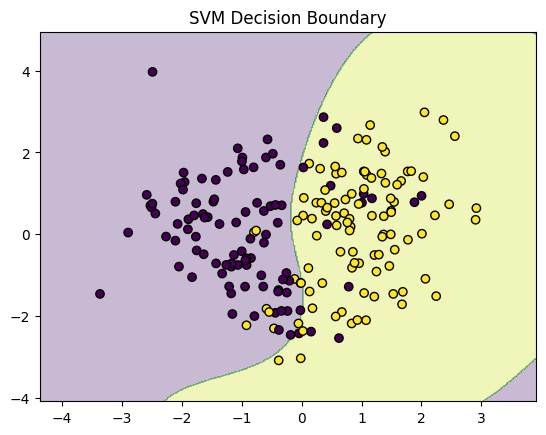

In [5]:
# Function to plot decision boundary
def plot_decision_boundary1(X, y, model):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title("SVM Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundary(X, y, svm_model)

In [6]:
# Function to plot decision boundary
def plot_decision_boundary(model, ax):
    ax.cla()
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    ax.set_title("SVM Decision Boundary Evolution")


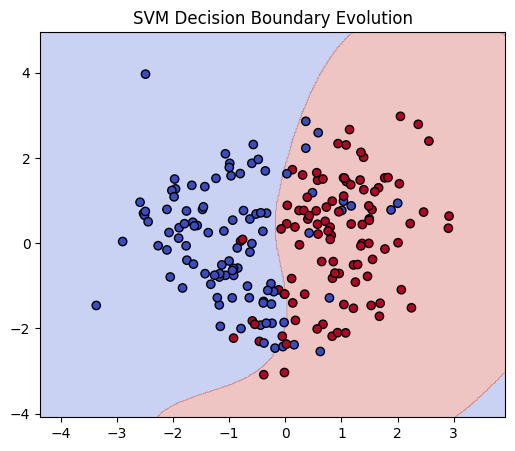

In [10]:
import matplotlib.animation as animation

# Initialize figure
fig, ax = plt.subplots(figsize=(6, 5))

# Animation function
def update(i):
    # Train model on increasing subset of data
    svm_model.fit(X_train[:i+10], y_train[:i+10])  # Gradually adding 10 samples
    plot_decision_boundary(svm_model, ax)

# Run animation
ani = animation.FuncAnimation(fig, update, frames=range(10, len(X_train), 10), repeat=False, interval=200)

# Save animation as GIF
ani.save("svm_decision_boundary_animation.gif", writer="pillow", fps=10)

plt.show()